In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from multiprocessing import cpu_count

In [ ]:
def parser(x):
	return datetime.strptime( x, '%Y-%m-%d')

# **Dataset Birth**

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/birth.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [ ]:
dataset.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

# **No. 1**

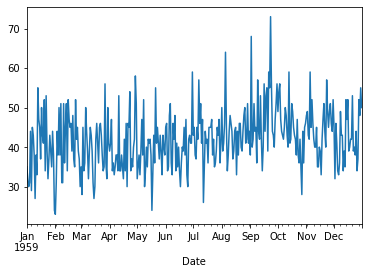

In [ ]:
dataset.plot()
plt.show()

# **No. 2**

Dalam data ini terdapat tidak terdapat trend dan juga tidak terdapat seasonal karena datanya rapat sekali dan tidak terlihat kenaikan. 

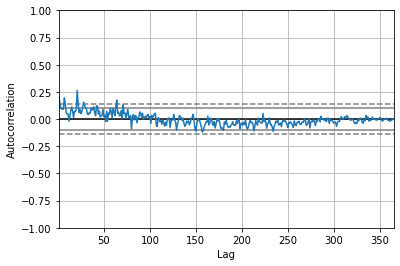

In [ ]:
pd.plotting.autocorrelation_plot(dataset)
plt.show()

# **No. 3**

In [ ]:
values = dataset.values
size = int(len(values) * 0.75)
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []


In [ ]:
model = AR(train)
model_fit = model.fit()
print('Lag:', model_fit.k_ar)

Lag: 15


In [ ]:
dataset_values = dataset.values

def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.75)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
	print('RMSE = %.2f'%(sqrt(best_score)))

In [ ]:
# stuck sampe 8

# import warnings

# p_values = range(0, 10)
# d_values = range(0, 3)
# q_values = range(0, 3)

# warnings.filterwarnings("ignore")
# evaluate_models(dataset_values, p_values, d_values, q_values)

# stuck sampe 8

ARIMA(0, 0, 0) MSE=45.405
ARIMA(0, 0, 1) MSE=41.620
ARIMA(0, 0, 2) MSE=40.567
ARIMA(0, 1, 0) MSE=58.455
ARIMA(0, 1, 1) MSE=44.235
ARIMA(0, 1, 2) MSE=42.342
ARIMA(0, 2, 0) MSE=167.269
ARIMA(0, 2, 1) MSE=58.862
ARIMA(1, 0, 0) MSE=40.595
ARIMA(1, 0, 1) MSE=41.727
ARIMA(1, 1, 0) MSE=47.747
ARIMA(1, 1, 1) MSE=42.153
ARIMA(1, 1, 2) MSE=43.191
ARIMA(1, 2, 0) MSE=103.386
ARIMA(2, 0, 0) MSE=39.523
ARIMA(2, 0, 1) MSE=39.778
ARIMA(2, 0, 2) MSE=40.583
ARIMA(2, 1, 0) MSE=42.871
ARIMA(2, 1, 1) MSE=41.882
ARIMA(2, 1, 2) MSE=42.284
ARIMA(2, 2, 0) MSE=77.984
ARIMA(3, 0, 0) MSE=39.027
ARIMA(3, 0, 1) MSE=39.532
ARIMA(3, 0, 2) MSE=39.598
ARIMA(3, 1, 0) MSE=41.486
ARIMA(3, 1, 1) MSE=42.290
ARIMA(3, 1, 2) MSE=43.131
ARIMA(3, 2, 0) MSE=63.026
ARIMA(4, 0, 0) MSE=38.845
ARIMA(4, 0, 1) MSE=42.206
ARIMA(4, 0, 2) MSE=38.719
ARIMA(4, 1, 0) MSE=42.619
ARIMA(4, 1, 1) MSE=42.548
ARIMA(4, 1, 2) MSE=41.689
ARIMA(4, 2, 0) MSE=57.109
ARIMA(5, 0, 0) MSE=39.260
ARIMA(5, 0, 1) MSE=39.137
ARIMA(5, 0, 2) MSE=41.213
ARIMA(5, 1

In [ ]:
import warnings

p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 3)

warnings.filterwarnings("ignore")
evaluate_models(dataset_values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=45.405
ARIMA(0, 0, 1) MSE=41.620
ARIMA(0, 0, 2) MSE=40.567
ARIMA(0, 1, 0) MSE=58.455
ARIMA(0, 1, 1) MSE=44.235
ARIMA(0, 1, 2) MSE=42.342
ARIMA(0, 2, 0) MSE=167.269
ARIMA(0, 2, 1) MSE=58.862
ARIMA(1, 0, 0) MSE=40.595
ARIMA(1, 0, 1) MSE=41.727
ARIMA(1, 1, 0) MSE=47.747
ARIMA(1, 1, 1) MSE=42.153
ARIMA(1, 1, 2) MSE=43.191
ARIMA(1, 2, 0) MSE=103.386
ARIMA(2, 0, 0) MSE=39.523
ARIMA(2, 0, 1) MSE=39.778
ARIMA(2, 0, 2) MSE=40.583
ARIMA(2, 1, 0) MSE=42.871
ARIMA(2, 1, 1) MSE=41.882
ARIMA(2, 1, 2) MSE=42.284
ARIMA(2, 2, 0) MSE=77.984
ARIMA(3, 0, 0) MSE=39.027
ARIMA(3, 0, 1) MSE=39.532
ARIMA(3, 0, 2) MSE=39.598
ARIMA(3, 1, 0) MSE=41.486
ARIMA(3, 1, 1) MSE=42.290
ARIMA(3, 1, 2) MSE=43.131
ARIMA(3, 2, 0) MSE=63.026
ARIMA(4, 0, 0) MSE=38.845
ARIMA(4, 0, 1) MSE=42.206
ARIMA(4, 0, 2) MSE=38.719
ARIMA(4, 1, 0) MSE=42.619
ARIMA(4, 1, 1) MSE=42.548
ARIMA(4, 1, 2) MSE=41.689
ARIMA(4, 2, 0) MSE=57.109
Best ARIMA(4, 0, 2) MSE=38.719
RMSE = 6.22


Untuk dataset ini menggunakan arima dapat di amati bahwa rmse yang tertinggi di dapat dengan nilai 6.22
dengan:

nilai ***p*** yakni lag order yang digunakan bernilai 4. artinya data yang di lihat berdasarkan 4 data waktu sebelumnya.

nilai ***d*** yang digunakan untuk membuat data stationary(konstan secara pergerakan) dengan nilai 0 

nilai ***q*** menggabungkan ketergantungan antara observasi dan nilai residual dari model moving average yang diterapkan pada nilai lag yang diamati dengan nilai 2.

# **No. 4**

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [4]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
n_test = int(len(dataset) * 0.75)

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(dataset, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(4, 0, 0), (0, 0, 0, 0), 'n']] 7.479
 > Model[[(4, 0, 0), (0, 0, 1, 0), 'n']] 6.988
 > Model[[(4, 0, 0), (0, 0, 2, 0), 'n']] 6.972
 > Model[[(4, 0, 0), (1, 0, 0, 0), 'n']] 7.413
 > Model[[(4, 0, 0), (1, 0, 1, 0), 'n']] 6.980
 > Model[[(4, 0, 0), (1, 0, 2, 0), 'n']] 6.940
 > Model[[(4, 0, 0), (2, 0, 0, 0), 'n']] 7.349
 > Model[[(4, 0, 0), (2, 0, 1, 0), 'n']] 7.011
 > Model[[(4, 0, 0), (0, 0, 0, 0), 'c']] 7.099
 > Model[[(4, 0, 0), (2, 0, 2, 0), 'n']] 7.038
 > Model[[(4, 0, 0), (0, 0, 1, 0), 'c']] 7.102
 > Model[[(4, 0, 0), (0, 0, 2, 0), 'c']] 7.084
 > Model[[(4, 0, 0), (1, 0, 0, 0), 'c']] 7.114
 > Model[[(4, 0, 0), (1, 0, 1, 0), 'c']] 7.100
 > Model[[(4, 0, 0), (1, 0, 2, 0), 'c']] 7.087
 > Model[[(4, 0, 0), (2, 0, 0, 0), 'c']] 7.106
 > Model[[(4, 0, 0), (2, 0, 1, 0), 'c']] 7.107
 > Model[[(4, 0, 0), (0, 0, 0, 0), 't']] 7.511
 > Model[[(4, 0, 0), (2, 0, 2, 0), 'c']] 7.087
 > Model[[(4, 0, 0), (0, 0, 1, 0), 't']] 7.160
 > Model[[(4, 0, 0), (0, 0, 2, 0), 't']] 7.101
 > Model[[(4,

(karena internet tiba-tiba mati saat proses jadi saya melihat berdasarkan hasil yang tersedia)

menurut sarima data dengan rmse terbaik berada pada nilai Model[[(4, 1, 0), (0, 0, 1, 0), 'n']] 6.928
dengan lag(***p***) bernilai 4 , ***d*** bernilai 1 , ***q*** bernilai 0 untuk bagian autoregressionnya 

sedangkan untuk seasonal nya parameternya dengan 
***Q*** bernilai 1, dan  ***P D m*** bernilai 0

serta trend yang di tunjukan bernilai n (No Trend)
artinya secara grafik memang tak terlihat trend dan seasonality.


# **No. 5**

SARIMA = [[(4, 1, 0), (0, 0, 1, 0), 'n']] 6.928

Best ARIMA(4, 0, 2) MSE=38.719
RMSE = 6.22

Berdasarkan hasil tersebut menunjukan bahwa rmse yang di dapat terbilang kecil karena data yang di gunakan bisa dibilang baik. dan untuk hasil dari kedua algoritma tersebut nilai lebih baik didapat oleh ARIMA karena secara grafik memang tidak menujukan adanya trend dan seasonality sehingga SARIMA tidak begitu baik saat digunakan dan hasilnya memang membuktikan bahwa untuk yang tidak punya trend dan seasonality lebih baik menggunakan ARIMA